<a id="6"></a>
# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 1px; color:#FAF0EF; font-size:150%; text-align:left; padding:10px; background:#4B9C65; border-radius: 10px;"> FIN</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [6]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [7]:
df.shape


(9704, 11)

In [8]:
df.describe()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [9]:
# Colonnes textuelles
text_cols = df.select_dtypes(include='object').columns
print("Colonnes textuelles :", list(text_cols))
print("Nombre :", len(text_cols))


Colonnes textuelles : ['origin', 'fuel_type', 'drivetrain']
Nombre : 3


In [10]:

# Colonnes numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nColonnes numériques :", list(num_cols))
print("Nombre :", len(num_cols))


Colonnes numériques : ['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year', 'num_doors', 'fuel_efficiency_mpg']
Nombre : 8


In [11]:
df=df[num_cols]

In [13]:
import matplotlib.pyplot as plt

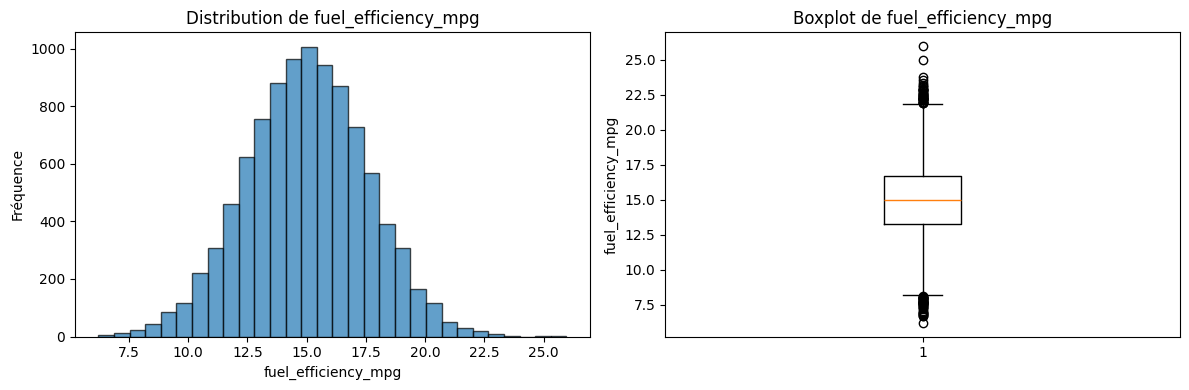

In [15]:
# EDA - Visualisation de fuel_efficiency_mpg
plt.figure(figsize=(12, 4))
# Histogramme
plt.subplot(1, 2, 1)
plt.hist(df['fuel_efficiency_mpg'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution de fuel_efficiency_mpg')
plt.xlabel('fuel_efficiency_mpg')
plt.ylabel('Fréquence')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['fuel_efficiency_mpg'].dropna())
plt.title('Boxplot de fuel_efficiency_mpg')
plt.ylabel('fuel_efficiency_mpg')

plt.tight_layout()
plt.show()

In [16]:
# Statistiques descriptives
print("Statistiques descriptives de fuel_efficiency_mpg:")
print(df['fuel_efficiency_mpg'].describe())

Statistiques descriptives de fuel_efficiency_mpg:
count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64


<a id="6"></a>
# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 1px; color:#FAF0EF; font-size:150%; text-align:left; padding:10px; background:#4B9C65; border-radius: 10px;"> Question 1</div>

##  There's one column with missing values. What is it?

In [17]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne:")
print(missing_values)

Valeurs manquantes par colonne:
engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


💡 horsepower

<a id="6"></a>
# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 1px; color:#FAF0EF; font-size:150%; text-align:left; padding:10px; background:#4B9C65; border-radius: 10px;"> Question 2
</div>

## What's the median (50% percentile) for variable 'horsepower'?

In [18]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne:")
print(missing_values)

Valeurs manquantes par colonne:
engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


<a id="6"></a>
# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 1px; color:#FAF0EF; font-size:150%; text-align:left; padding:10px; background:#4B9C65; border-radius: 10px;"> Question 3
</div>

## Prepare and split the dataset
 
🌟 Shuffle the dataset (the filtered one you created above), use seed 42. \
 

 



In [19]:
# Suppression des lignes où la cible est manquante
df = df.dropna(subset=['fuel_efficiency_mpg'])
df = df.reset_index(drop=True)



## 🌟 Split your data in train/val/test sets, with 60%/20%/20% distribution.
 

In [20]:
# Séparation train/val/test avec 60%/20%/20%
np.random.seed(42)
n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [21]:
# Copie des données
train0 = df_train.copy()
val0 = df_val.copy()
train_mean = df_train.copy()
val_mean = df_val.copy()

# Calcul de la moyenne
mean_horsepower = train_mean['horsepower'].mean()

# Remplissage avec 0
train0['horsepower'] = train0['horsepower'].fillna(0)
val0['horsepower'] = val0['horsepower'].fillna(0)

# Remplissage avec la moyenne
train_mean['horsepower'] = train_mean['horsepower'].fillna(mean_horsepower)
val_mean['horsepower'] = val_mean['horsepower'].fillna(mean_horsepower)

# Préparation des caractéristiques
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

# Modèle avec remplissage par 0
X_train0 = train0[features]
y_train0 = train0[target]
X_val0 = val0[features]
y_val0 = val0[target]

model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_val0)
rmse0 = np.sqrt(mean_squared_error(y_val0, y_pred0))
rmse0 = round(rmse0, 2)

# Modèle avec remplissage par moyenne
X_train_mean = train_mean[features]
y_train_mean = train_mean[target]
X_val_mean = val_mean[features]
y_val_mean = val_mean[target]

model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val_mean, y_pred_mean))
rmse_mean = round(rmse_mean, 2)

print(f"RMSE avec 0: {rmse0}")
print(f"RMSE avec moyenne: {rmse_mean}")

RMSE avec 0: 0.52
RMSE avec moyenne: 0.46


<a id="6"></a>
# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 1px; color:#FAF0EF; font-size:150%; text-align:left; padding:10px; background:#4B9C65; border-radius: 10px;"> Question 4
</div>

In [22]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
best_rmse = float('inf')
best_r = None

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train0, y_train0)
    y_pred = model.predict(X_val0)
    rmse = np.sqrt(mean_squared_error(y_val0, y_pred))
    rmse = round(rmse, 2)
    print(f"r={r}, RMSE={rmse}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_r = r

print(f"Meilleur r: {best_r}")

r=0, RMSE=0.52
r=0.01, RMSE=0.52
r=0.1, RMSE=0.52
r=1, RMSE=0.52
r=5, RMSE=0.52
r=10, RMSE=0.52
r=100, RMSE=0.52
Meilleur r: 0


<a id="6"></a>
# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 1px; color:#FAF0EF; font-size:150%; text-align:left; padding:10px; background:#4B9C65; border-radius: 10px;"> Question 5
</div>

In [23]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(len(df))
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    
    # Remplissage par 0
    df_train_filled = df_train.copy()
    df_val_filled = df_val.copy()
    df_train_filled['horsepower'] = df_train_filled['horsepower'].fillna(0)
    df_val_filled['horsepower'] = df_val_filled['horsepower'].fillna(0)
    
    X_train = df_train_filled[features]
    y_train = df_train_filled[target]
    X_val = df_val_filled[features]
    y_val = df_val_filled[target]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

std_rmse = np.std(rmse_scores)
std_rmse = round(std_rmse, 3)
print(f"Écart type des RMSE: {std_rmse}")
print(f"Scores RMSE: {[round(score, 3) for score in rmse_scores]}")

Écart type des RMSE: 0.007
Scores RMSE: [0.521, 0.522, 0.523, 0.516, 0.511, 0.529, 0.532, 0.51, 0.515, 0.513]


<a id="6"></a>
# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 1px; color:#FAF0EF; font-size:150%; text-align:left; padding:10px; background:#4B9C65; border-radius: 10px;"> Question 6
</div>

In [24]:
# Division avec seed=9
np.random.seed(9)
idx = np.arange(len(df))
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# Combinaison train + validation
df_train_val = pd.concat([df_train, df_val])

# Remplissage par 0
df_train_val_filled = df_train_val.copy()
df_test_filled = df_test.copy()
df_train_val_filled['horsepower'] = df_train_val_filled['horsepower'].fillna(0)
df_test_filled['horsepower'] = df_test_filled['horsepower'].fillna(0)

X_train_val = df_train_val_filled[features]
y_train_val = df_train_val_filled[target]
X_test = df_test_filled[features]
y_test = df_test_filled[target]

# Entraînement avec r=0.001
model = Ridge(alpha=0.001)
model.fit(X_train_val, y_train_val)
y_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test = round(rmse_test, 2)
print(f"RMSE sur l'ensemble de test: {rmse_test}")

RMSE sur l'ensemble de test: 0.52


<a id="6"></a>
# <div style="font-family: 'Playfair Display', serif; font-weight:bold; letter-spacing: 1px; color:#FAF0EF; font-size:150%; text-align:left; padding:10px; background:#4B9C65; border-radius: 10px;"> FIN</div>